In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# The yFinance library.

You can create a ticker object to get the stock information. We will use the Microsoft stock MSFT as an example. 

In [2]:
msft = yf.Ticker('MSFT')

In [3]:
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
...,...,...
2020-02-19,0.51,0.0
2020-05-20,0.51,0.0
2020-08-19,0.51,0.0


In [4]:
msft.major_holders

,0,1
0,0.06%,% of Shares Held by All Insider
1,71.84%,% of Shares Held by Institutions
2,71.89%,% of Float Held by Institutions
3,4849,Number of Institutions Holding Shares


In [5]:
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",614100233,2020-12-30,0.0814,136588173823
1,Blackrock Inc.,515509179,2020-12-30,0.0683,114659551593
2,State Street Corporation,299126371,2020-12-30,0.0397,66531687437
3,"FMR, LLC",222257473,2020-12-30,0.0295,49434507144
4,Price (T.Rowe) Associates Inc,177500157,2020-12-30,0.0235,39479584919
5,"Geode Capital Management, LLC",117798162,2020-12-30,0.0156,26200667192
6,Capital World Investors,110441260,2020-12-30,0.0146,24564345049
7,Capital Research Global Investors,95506129,2020-12-30,0.0127,21242473212
8,Capital International Investors,91995988,2020-12-30,0.0122,20461747650
9,Northern Trust Corporation,91215100,2020-12-30,0.0121,20288062542


We can also pull the historical data about the stock of interest. We have multiple parameters that we can adjust. 
* `period`: How far back should we pull the data (1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max.)
* `interval`: How long between datapoints (1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo.)

In [6]:
hist = msft.history(period='5y', interval='1d')
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-03-21,48.828746,49.452287,48.535316,49.388100,23925700,0.0,0
2016-03-22,49.158852,49.745713,49.021305,49.580658,23124100,0.0,0
2016-03-23,49.617347,49.736555,49.278069,49.488972,20129000,0.0,0
2016-03-24,49.369767,49.819085,49.268899,49.709045,19950000,0.0,0
2016-03-28,49.709039,49.782398,48.902106,49.094669,17025100,0.0,0
...,...,...,...,...,...,...,...
2021-03-15,234.960007,235.190002,231.809998,234.809998,26034900,0.0,0
2021-03-16,236.279999,240.059998,235.940002,237.710007,27717700,0.0,0
2021-03-17,236.149994,238.550003,233.229996,237.039993,29500700,0.0,0


We can use the library MatPlotLib to graph the data. You can make pretty much any chart you can think of using this library. 

Text(0.5, 1.0, 'Opening price of MSFT')

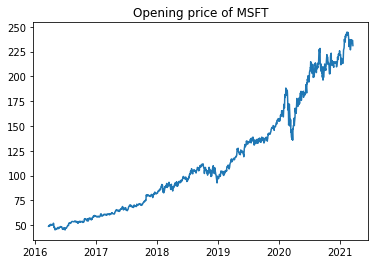

In [7]:
plt.plot(hist['Open'])
plt.title("Opening price of MSFT")

# Creating a correlation matrix. 

Now, lets create a correlation matrix based on the stock tickers that we can pull. We will use MSFT and AAPL as examples. The correlation matrix will calculated using pearson correlation.

,MSFT,AAPL
Date,,
2016-03-21,48.828746,24.631609
2016-03-22,49.158852,24.473487
2016-03-23,49.617347,24.759496
2016-03-24,49.369767,24.524643
2016-03-28,49.709039,24.647880
...,...,...
2021-03-15,234.960007,121.410004
2021-03-16,236.279999,125.699997
2021-03-17,236.149994,124.050003


,MSFT,AAPL
MSFT,1.000000,0.960031
AAPL,0.960031,1.000000


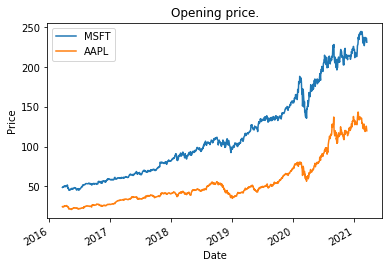

In [13]:
tickers = ['MSFT', 'AAPL']

df = pd.DataFrame()
for t in tickers: 
    tmp_ticker = yf.Ticker(t)
    tmp_hist = tmp_ticker.history(period='5y', interval='1d')
    df[t] = tmp_hist['Open']

display(df)
display(df.corr(method='pearson'))
df.plot(title="Opening price.", ylabel='Price', xlabel='Date')

Now, for automation, we can put the above code into a function so we can reuse it. 

In [9]:
def get_correlation_matrix(tickers, period='5y', interval='1d', cor_method='pearson'): 
    df = pd.DataFrame()
    for t in tickers: 
        tmp_ticker = yf.Ticker(t)
        tmp_hist = tmp_ticker.history(period=pe riod, interval=interval)
        df[t] = tmp_hist['Open']
    return df.corr(method=cor_method)

In [10]:
get_correlation_matrix(['MSFT', 'AAPL', 'TSLA', 'CROX', 'GME', 'AMC'])

,MSFT,AAPL,TSLA,CROX,GME,AMC
MSFT,1.000000,0.960031,0.778669,0.901495,0.164615,-0.831671
AAPL,0.960031,1.000000,0.893770,0.916326,0.247838,-0.753508
TSLA,0.778669,0.893770,1.000000,0.871425,0.464645,-0.513929
CROX,0.901495,0.916326,0.871425,1.000000,0.353504,-0.671763
GME,0.164615,0.247838,0.464645,0.353504,1.000000,0.116233
AMC,-0.831671,-0.753508,-0.513929,-0.671763,0.116233,1.000000
